# Data Analyst Professional Practical Exam Submission

## 1. DATA VALIDATION

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pingouin
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv('product_sales.csv')
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


 ### Data type validation
Initial overview of data types of each column using .info() shows that all columns have the appropriate data types. 

 |#   |Column             |Non-Null Count  |Dtype|  
|---  |------             |--------------  |-----|  
 |0   |week               |15000 non-null  |int64|  
 |1   |sales_method       |15000 non-null  |object| 
 |2   |customer_id        |15000 non-null  |object| 
 |3   |nb_sold            |15000 non-null  |int64|  
 |4   |revenue            |13926 non-null  |float64|
 |5   |years_as_customer  |15000 non-null  |int64| 
 |6   |nb_site_visits     |15000 non-null  |int64|  
 |7   |state              |15000 non-null  |object| 
 
 
The total length of the dataset is 15000 rows, which points out that "revenue" is the only column with missing values.

Next is the further inspection of each column's values to see if they make sense 

### 'customer_id' column
"customer_id" column is valid since the total counts of unique values in the column is the same as the total length of the dataset (15000 unique values). This means every id is unique and can be used as an unique identifier for the customer.

In [3]:
sales['customer_id'].nunique()

15000

### 'week' column
The 'week' column has discrete unique values ranging from 1 to 6 consecutively without any missing values in between. Therefore, it is valid to record the time each sales was made after launching the product line.

In [4]:
sales['week'].unique()

array([2, 6, 5, 4, 3, 1])

### 'sales_method' column
'sales_method' should only return 3 unique values for each of the sales method deployed by the company. However,
checking for unique values reveals inconsistent naming of methods. Specifically there are 5 different categories in the provided dataset:

*['Email', 'Email + Call', 'Call', 'em + call', 'email']*

*'em + call'* and *'email'* are identified as wrong entries. 

These inaccurate entries are then replaced with *"Email + Call"* and *"Email"* respectively.

In [5]:
#Replacing inaccurate expressions
replace_dict = {'em + call':'Email + Call', 'email':'Email'}
sales['sales_method'] = sales['sales_method'].replace(replace_dict)

In [6]:
#sales_method column
#Checking sales_method column reveals inconsistent naming of methods
sales['sales_method'].unique()

array(['Email', 'Email + Call', 'Call'], dtype=object)

### 'state' column
The column's unique values for every state are checked against a list of 50 states in the US. The results show that all the values are valid names for US states.

In [7]:
us_states = ['Alabama',
'Alaska',
'Arizona',
'Arkansas',
'California',
'Colorado',
'Connecticut',
'Delaware',
'Florida',
'Georgia',
'Hawaii',
'Idaho',
'Illinois',
'Indiana',
'Iowa',
'Kansas',
'Kentucky',
'Louisiana',
'Maine',
'Maryland',
'Massachusetts',
'Michigan',
'Minnesota',
'Mississippi',
'Missouri',
'Montana',
'Nebraska',
'Nevada',
'New Hampshire',
'New Jersey',
'New Mexico',
'New York',
'North Carolina',
'North Dakota',
'Ohio',
'Oklahoma',
'Oregon',
'Pennsylvania',
'Rhode Island',
'South Carolina',
'South Dakota',
'Tennessee',
'Texas',
'Utah',
'Vermont',
'Virginia',
'Washington',
'West Virginia',
'Wisconsin',
'Wyoming']

all(sales['state'].isin(us_states))

True

### 'nb_site_visists' column

![Histogram for 'nb_site_visits' column]('nb_site_visits'_histogram.png)
The values in this column is normally distributed, with only a few outliers

<AxesSubplot: xlabel='nb_site_visits', ylabel='Count'>

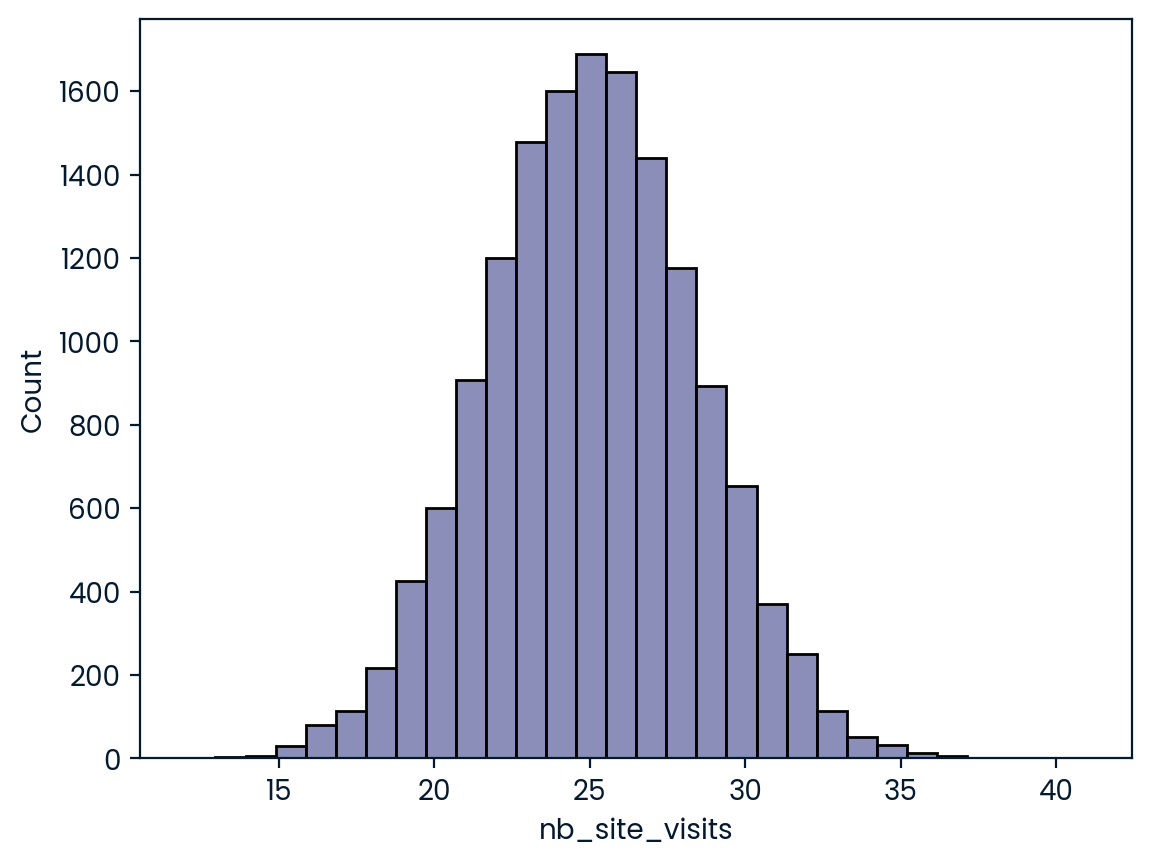

In [8]:
sns.histplot(data=sales['nb_site_visits'],bins=30)

<AxesSubplot: xlabel='nb_site_visits'>

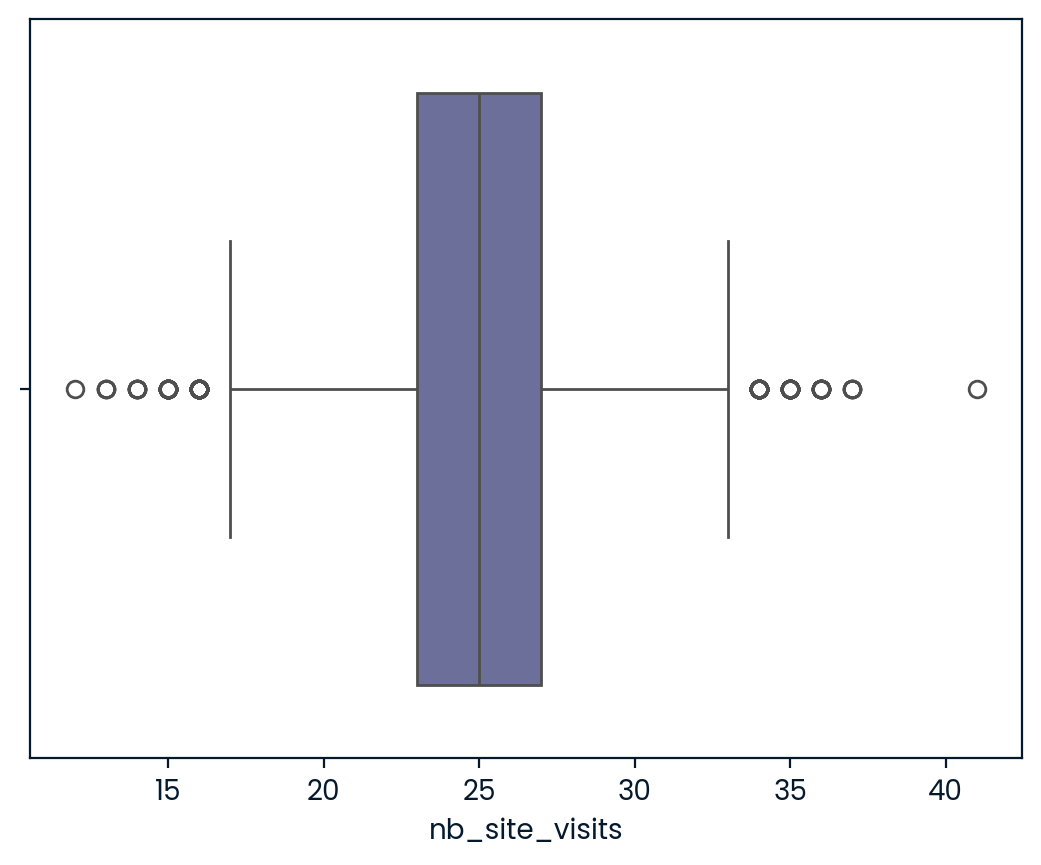

In [9]:
sns.boxplot(data = sales, x='nb_site_visits')

![](nb_site_visits_boxplot.png)

### 'nb_sold' column
'nb_sold' column is a discrete variable with very few unique values. We use countplot to visualize the distribution of all these values. The distribution is approximately normal.

![](nb_sold_countplot.png)

<AxesSubplot: xlabel='nb_sold', ylabel='count'>

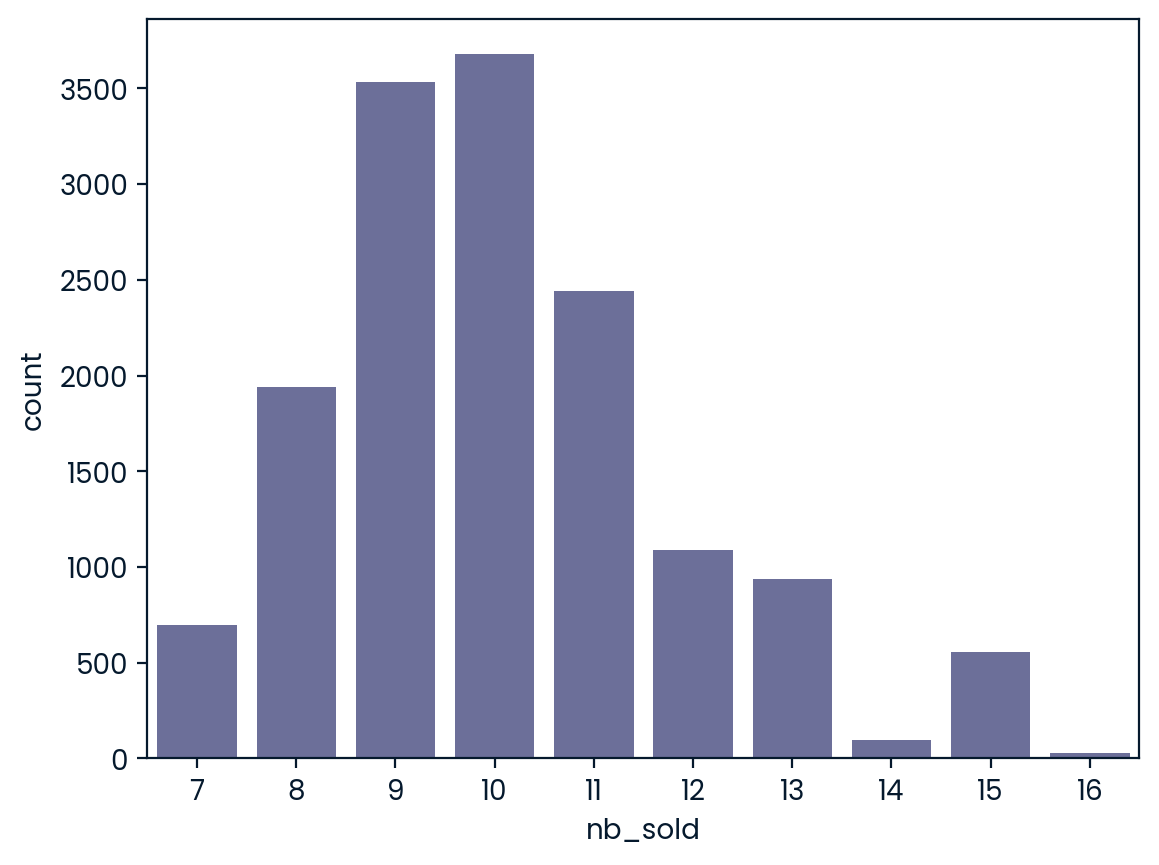

In [10]:
sales['nb_sold'].nunique()
sns.countplot(data=sales,x='nb_sold')

### 'years_as_customer' column
The 'years_as_customer' column has values ranging from 0 to 63 years in the dataset. However, as the company has only been running since 1984, the maximum possible years for any customer must be 40 years at the time this report is written (2024).

The existence of values higher than 40 means that there are records with invalid amount of years. Querying for rows with 'years_as_customer' higher than 40 reveals only 2 records, all of which are in California - the state with the highest count of sales made. 

Therefore, it is feasible to drop these rows from the dataset without affecting the data too much.

In [11]:
print(sales['years_as_customer'].min(),sales['years_as_customer'].max())

0 63


In [12]:
sales[sales['years_as_customer'] > 40]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [13]:
sales=sales[sales['years_as_customer'] <=40]
sales[sales['years_as_customer'] > 40]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state


<AxesSubplot: xlabel='years_as_customer'>

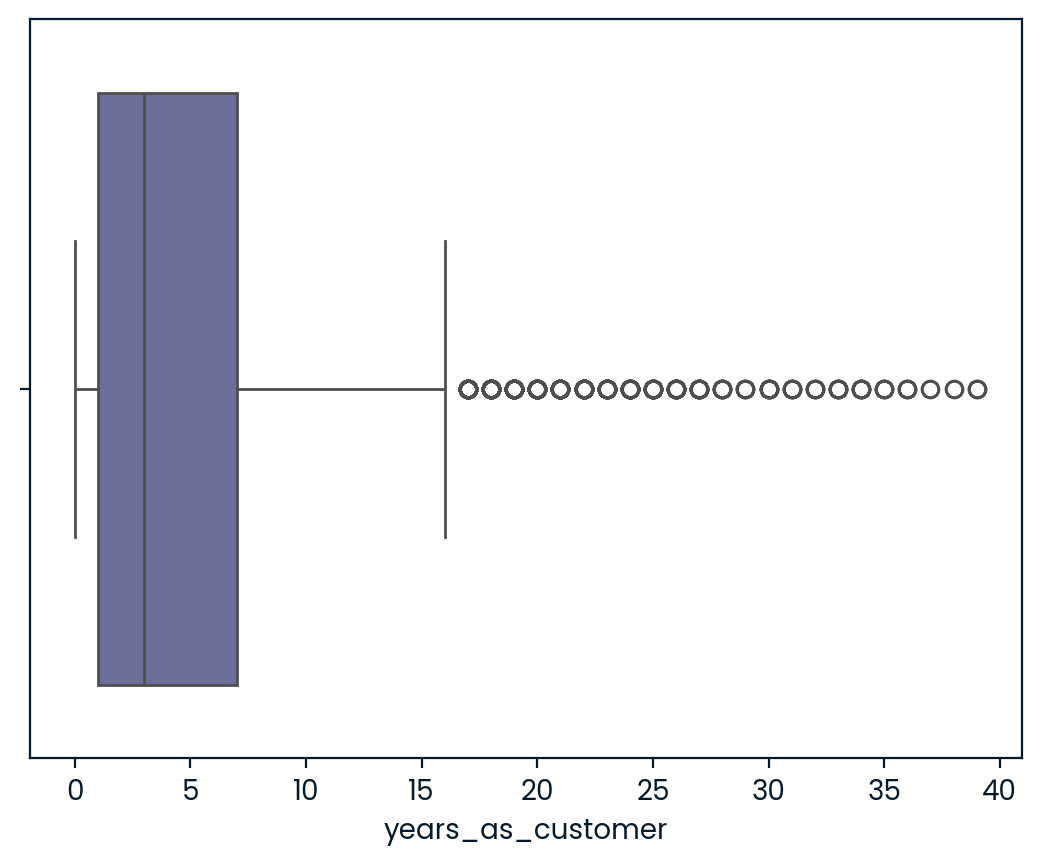

In [14]:
sns.boxplot(data=sales, x= 'years_as_customer')

### 'revenue' column
As observed previously, 'revenue' is the only column with missing values. In the dataset, the percentage of rows with missing revenue is about 7% of total rows, exceeding the commonly used arbitrary threshold of 5%. 

Therefore, a more ideal approach other than dropping missing records would be to fill those missing values. Since the company needs to assess sales performance for different sales method, the chosen approach is to impute missing values with the median of revenue secured by each method.

In [15]:
sales['revenue'].isnull().sum()/len(sales['revenue'])

0.0716095479397253

In [16]:
# Fill null revenue values with median value grouped by sales_method
revenue_dict = sales.groupby('sales_method')['revenue'].median().to_dict()
sales['revenue'] = sales['revenue'].fillna(sales['sales_method'].map(revenue_dict))
sales.isna().sum()

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64

## 2. EXPLORATORY DATA ANALYSIS

In [17]:
sales['sales_method'].value_counts()

Email           7465
Call            4961
Email + Call    2572
Name: sales_method, dtype: int64

 ### Total number of customers acquired through each sales method
 
 | Sales method | Count of customers |
 |---|---|
 | Email | 7465 |
 | Call | 4961 |
 | Email + Call | 2572 |
 
Selling through Email secured the most amount of orders, followed by Call method, while the Email + Call method got the least amount customers to purchase.

[Text(0.5, 1.0, 'Total revenue for each method')]

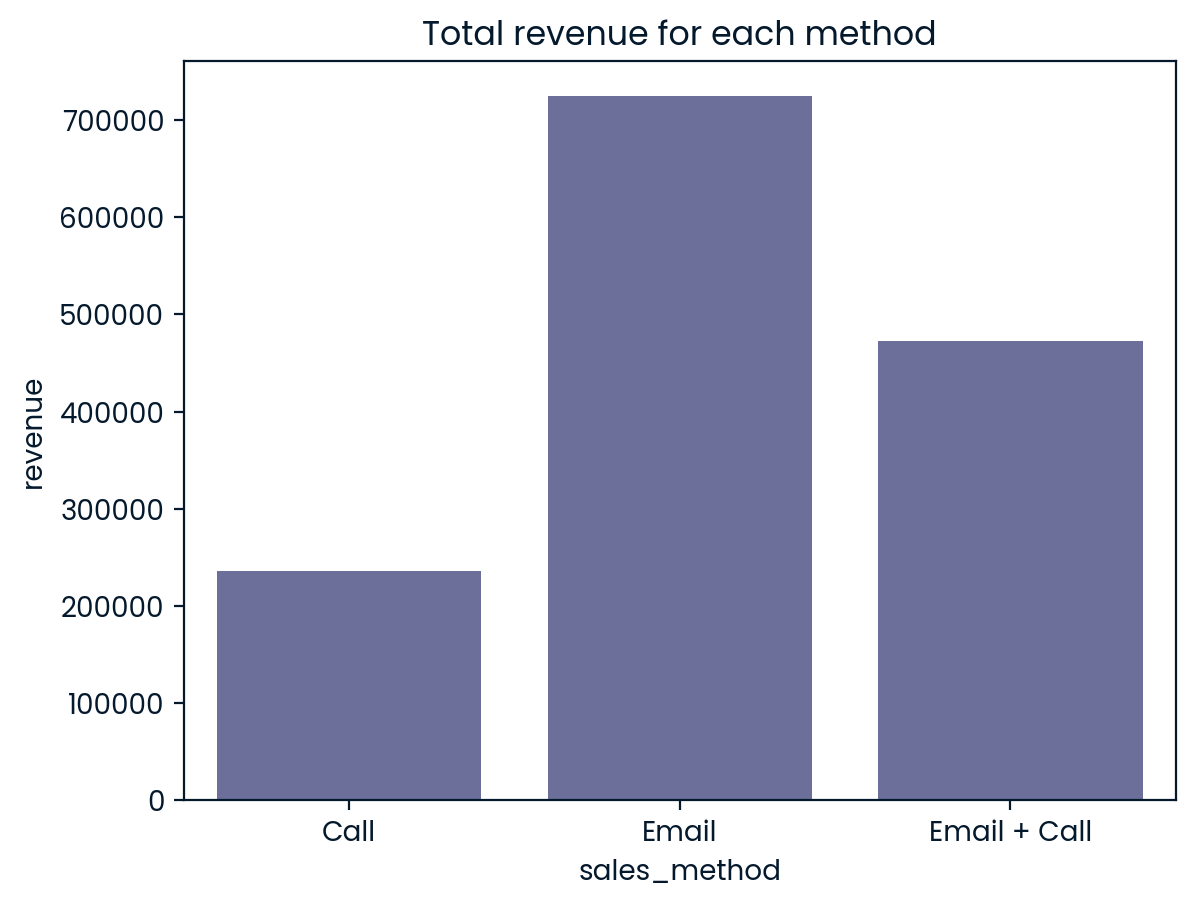

In [18]:
ax = sns.barplot(sales.groupby('sales_method')['revenue'].sum())
ax.set(title='Total revenue for each method')

In [19]:
sales.groupby('sales_method')['revenue'].sum()

sales_method
Call            236391.07
Email           724216.13
Email + Call    472730.95
Name: revenue, dtype: float64

![](revenue_by_method.png)

However, total revenue generated using Email + Call is significantly higher than using Call only as shown in the graph below.

### Spread of overall revenue

![](overall_rev_spread.png)

Revenue generated from a sale of the new line of products has a wide range from 32.5 to 238.32 with many outliers.

<AxesSubplot: xlabel='revenue'>

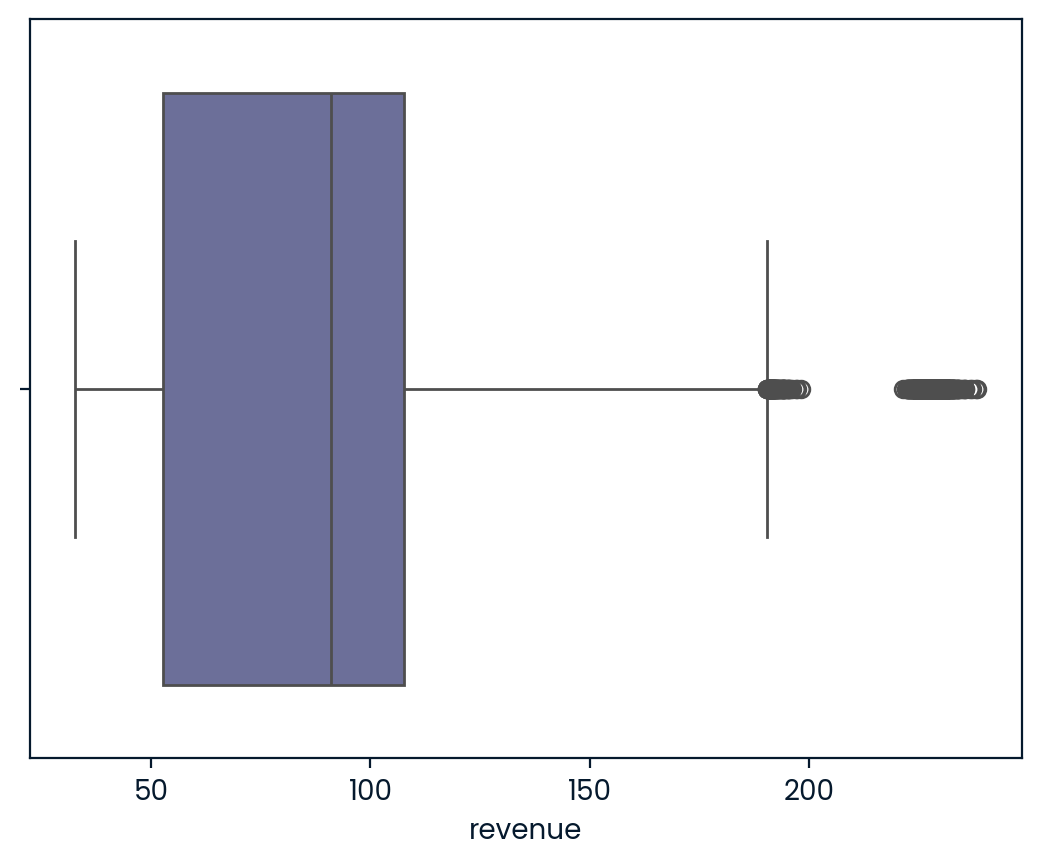

In [20]:
sns.boxplot(data=sales,x='revenue')

In [21]:
print(sales['revenue'].min(),sales['revenue'].max())

32.54 238.32


![](revenue_histogram.png)

According to the dataset, revenue has a multi-modal distribution with many peaks in the histogram, suggesting that the products sold varied greatly in prices.

<AxesSubplot: xlabel='revenue', ylabel='Count'>

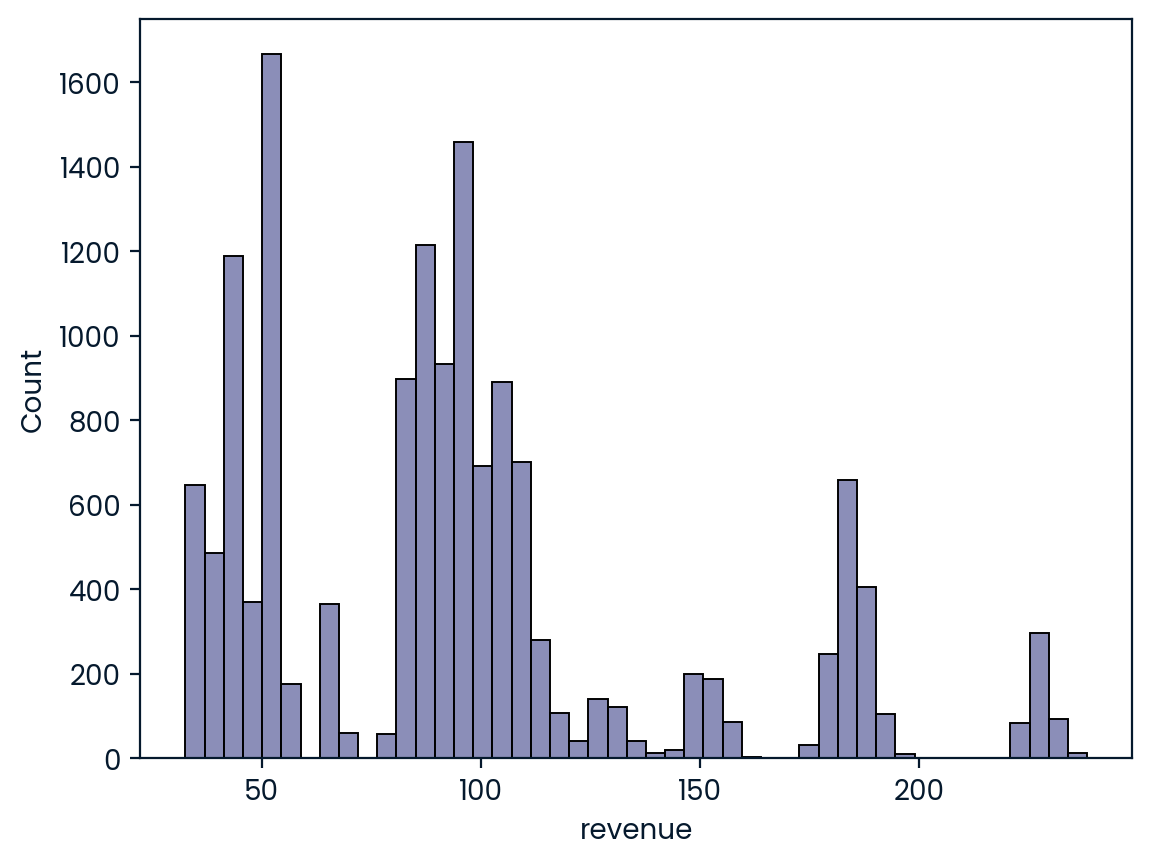

In [22]:
sns.histplot(data=sales,x='revenue')

[Text(0.5, 1.0, 'Revenue spread by method')]

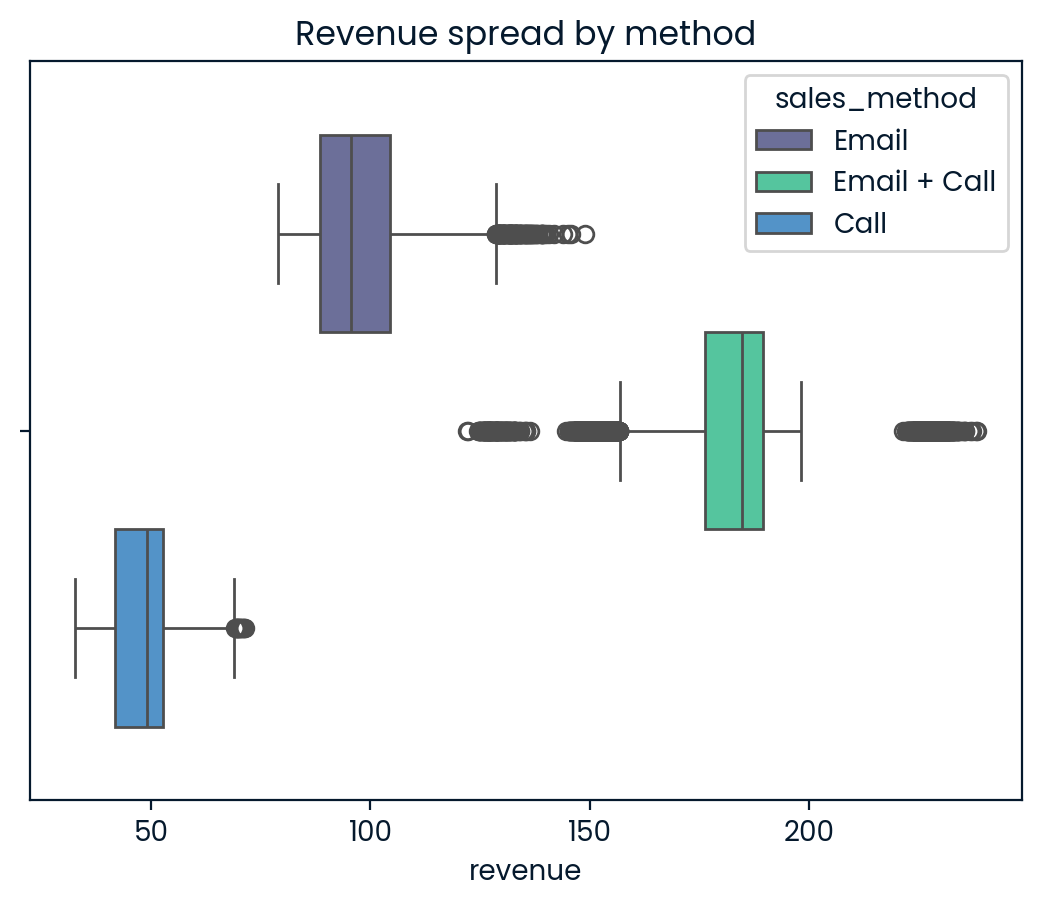

In [23]:
ax = sns.boxplot(data=sales,x='revenue',hue='sales_method')
ax.set(title='Revenue spread by method')

### Spread of revenue for each method

![](revenue_spread_by_method.png)

In general, the Email + Call method tended to bring in the highest revenue per order, followed by Email only method. The Call method generated the lowest spread of revenue.

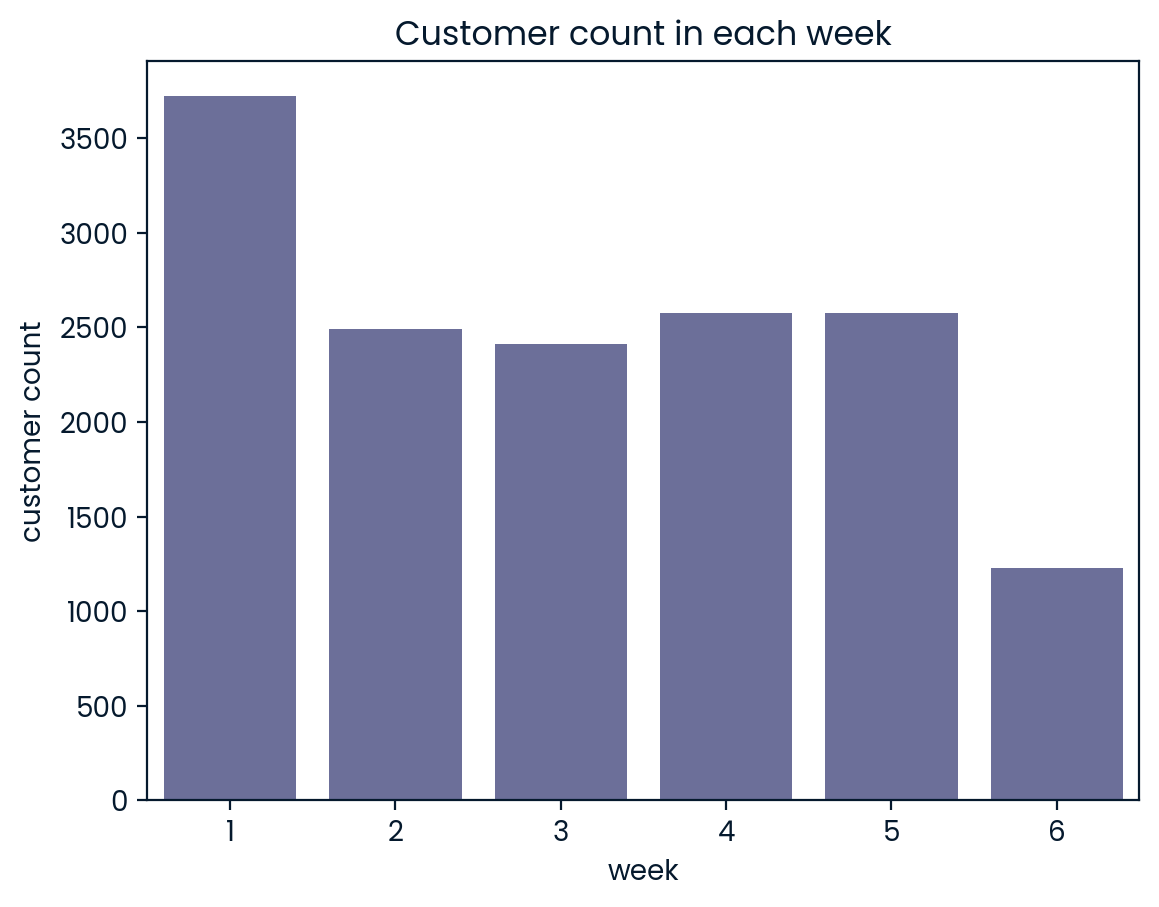

In [24]:
ax = sns.countplot(data=sales, x='week')
ax.set(ylabel='customer count',title='Customer count in each week')
plt.show()

![](customer_count_by_week.png)

The highest amount of sales occurred in the 1st week, and then this number gradually declined. The 6th week saw the least customers.

[Text(0.5, 1.0, 'Revenue generated by each method over time')]

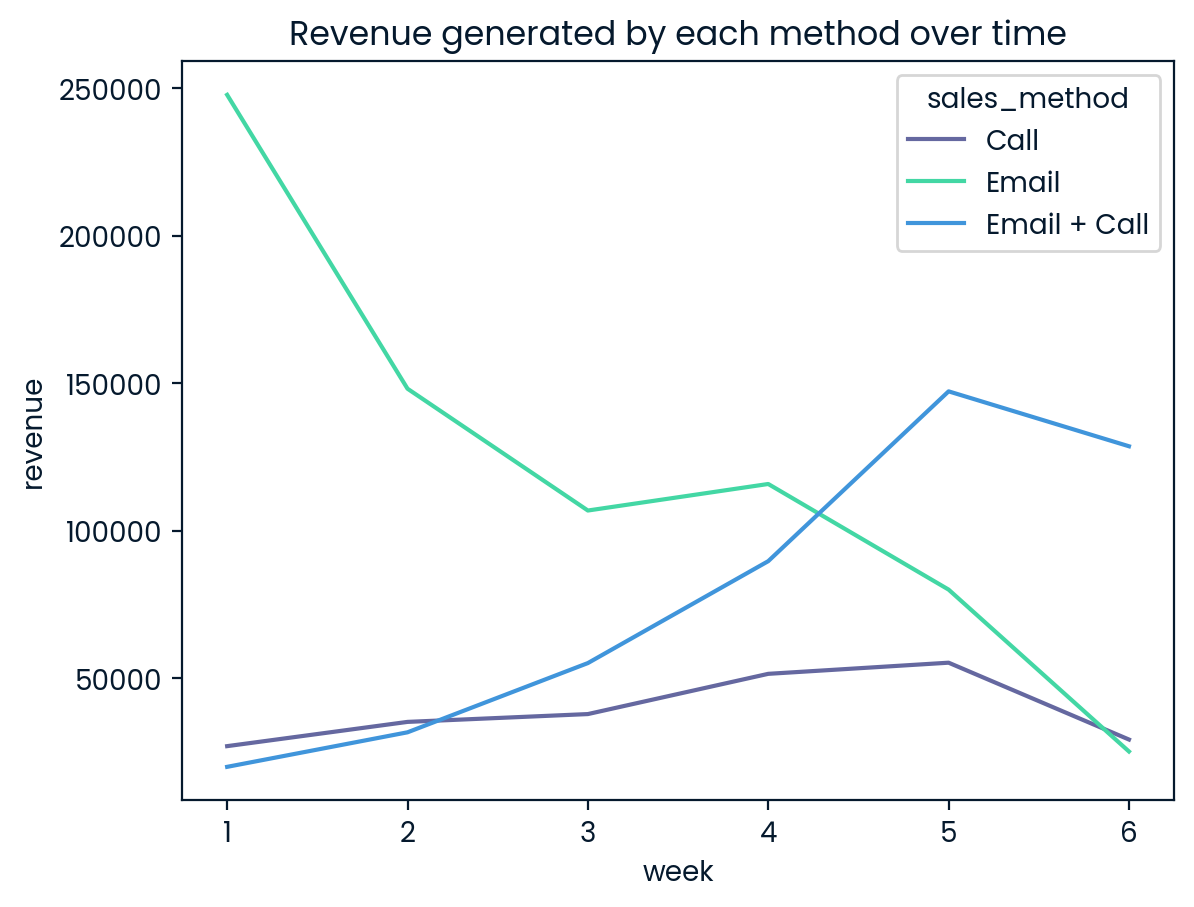

In [25]:
weekly_rev_method=sales.groupby(['week','sales_method'])['revenue'].sum().reset_index()
ax = sns.lineplot(data=weekly_rev_method,x='week',y='revenue',hue='sales_method')
ax.set(title='Revenue generated by each method over time')

### Revenue overtime for each of the methods

![](Overtime_rev_by_method.png)

In the first week, revenue from Email method reached its maximum value of around 250K while the total revenue of the two remaining methods was less than 50K.

However, as we progressed into the 2nd week, revenue from Email saw a steep decline to almost 150K. From that point onward, revenue coming from this method dropped constantly, with little resistance, to the lowest revenue value in the last week.

On the contrary, revenue from the Email + Call method saw a rapid surge after week 1 before capping off at around 150K in week 5. The Email + Call method ended up generated the highest revenue in the last week, which was 5 times higher than that of the Email method.

Meanwhile, revenue gained from Call method remained fairly stagnant with only marginal increase overtime, reaching approximately 50K at its highest in week 5.

![](total_rev_by_each_week.png)

Graphing revenue for each week reveals the drop in revenue after the 1st week, which could be explained by the drop in Email sales. 

Later on, the upsurge in revenue from week 3 to week 5 coincided with the sharp rise in revenue generated from Email + Call method in the same period despite the constant decrease in that from Email. Combined with the fact that Email + Call had the highest revenue spread, it can be inferred that the revenue growth generated from this method single handedly drove revenue to recover quickly after the dip at the end of the 1st week.


![](revenue_change_by_week.png) 

The sudden drop in revenue in the last week happened at the same time when the number of customers plummetted, as did the number of customers acquired from each of the sales method. This suggests that the company could not attract customers as effectively in the 6th week after launch regardless of method used.

In [26]:
sales.groupby(['week','sales_method'])['revenue'].sum().loc[(6,slice(None))]

sales_method
Call             29282.97
Email            25236.03
Email + Call    128702.37
Name: revenue, dtype: float64

[Text(0.5, 1.0, 'Count of customers for each sales method over time')]

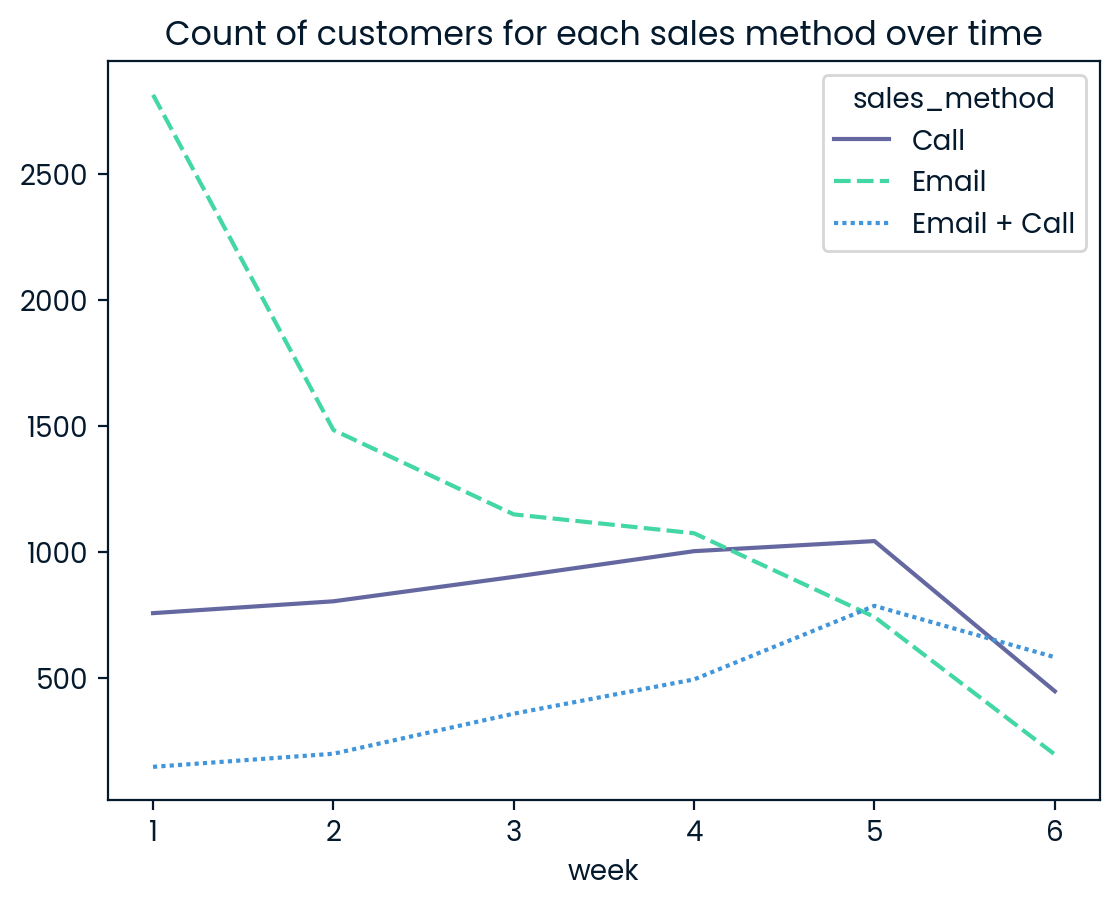

In [27]:
method_by_week=sales.groupby('week')['sales_method'].value_counts().unstack()
ax = sns.lineplot(method_by_week)
ax.set(title='Count of customers for each sales method over time')

Graphing the Count of each sales method being used successfully over time shows similar trends. The important difference was that the count for Call method was constantly higher than Email + Call until the last week.


![](customer_count_by_method_over_time.png)

### Email + Call method versus Call only method

Although the Call method helped secured more orders than Email + Call, it ultimately generated less revenue than Email + Call. This is due to Call having the lowest revenue spread per customer while Email + Call had the highest revenue spread per customer. This means they chose to buy in larger quantity or buy more expensive products when sales are made using Email + Call method.

Factoring in the fact that Call method is significantly more time consuming to carry out (30-minute calls for Call versus only 10-minute calls for Email + Call), it can be concluded that Call is much less effective than Email + Call.

### Email + Call method versus Email only method

To have a meaningful comparison between Email + Call and Email only sales method, we need to consider how each method is executed.

For the Email only method, as the 2nd email was only sent 3 weeks after the first one, it can be inferred that only from the 4th week onward can sales generated from Email method be attributable to the 2nd email. But by the 4th week, the revenue generated from this method had already been decreasing with no sign of stopping. This is to say that the 2nd email had limited contribution to the overall revenue.

In the same token, we can also view revenue created by using the Email method within the 1st week as revenue made from the initial step of the Email + Call method. 

For the Email + Call method, as the follow up call was only made 1 week after the initial email, only from the 2nd week onward can sales generated from Email + Call method be attributable to the follow up call. Indeed, in the graph, revenue from Email + Call method started to climb from the 2nd week onward, suggesting that the follow up calls 1 week later were effective in growing sales.

![](perc_method_over_time.png)

This graph shows that the percentage of customers acquired via Email dropped rapidly after the 1st week, while the percentage of the remaining two methods, both of which involved making phone calls, saw constant surge.

It can be hypothesized that the Email + Call method could be effective in both of its phase in different time:
- The initial email could be effective in attracting sales in the 1st week
- As revenue from the 1st email lost momentum, the subsequent call proved more effective in growing sales than sending an additional email from the 2nd week onward

![](average_revenue_per_cust_over_time.png)

As a result from the change in percentage of sales method used, the average revenue per customer also increased, suggesting that methods involving calling customers after the 1st week persuaded each of them to make larger purchases.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6')])

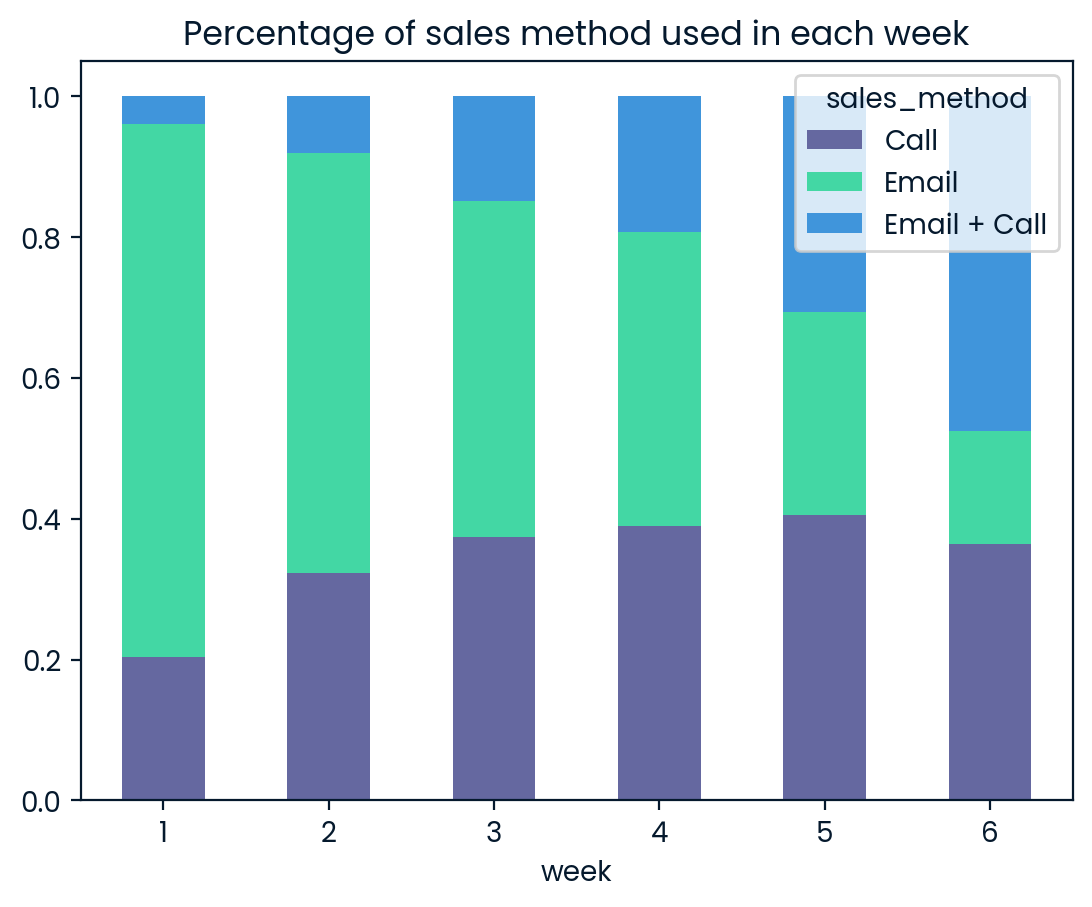

In [28]:
method_by_week=sales.groupby('week')['sales_method'].value_counts(normalize=True,sort=False)
method_by_week.unstack('sales_method').plot(kind='bar',stacked=True,title='Percentage of sales method used in each week')
plt.xticks(rotation=0)

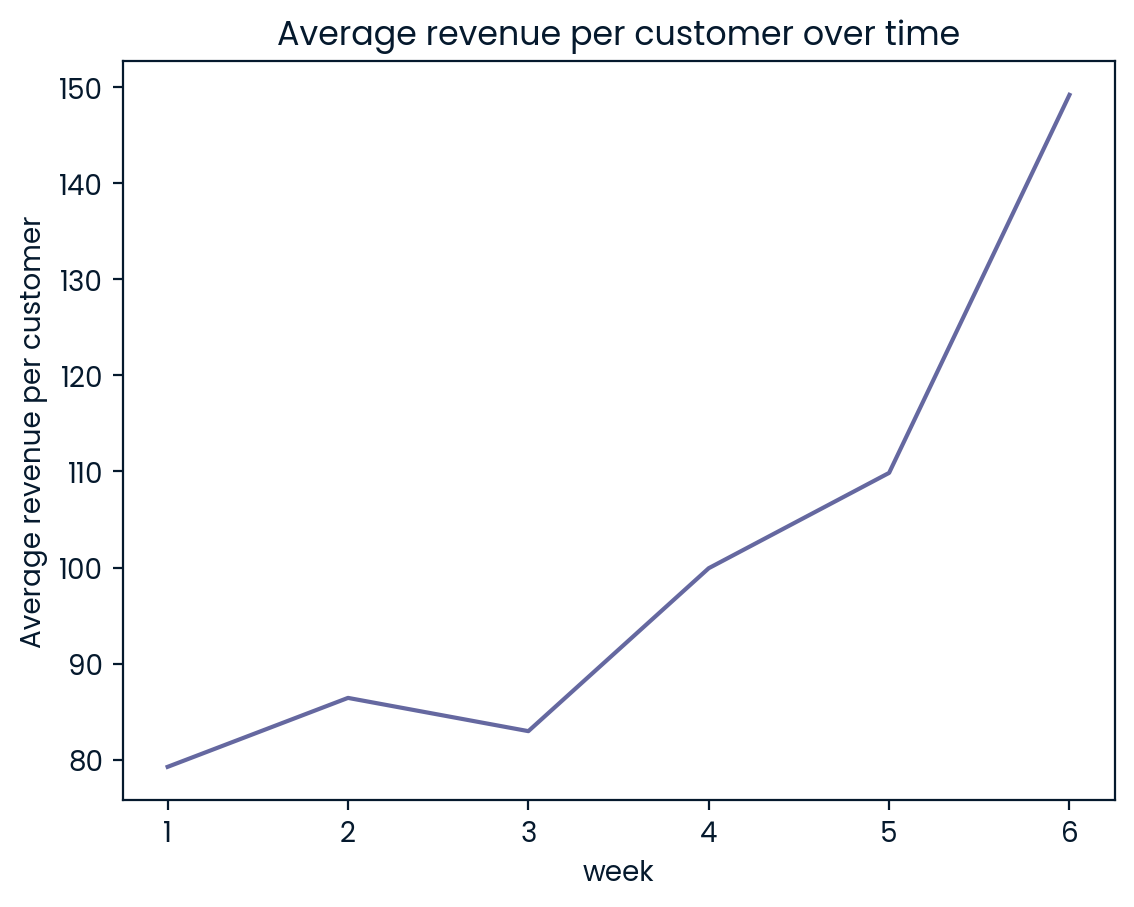

In [29]:
rev_n_customers= sales.groupby('week').agg(total_revenue=('revenue','sum'),total_customers=('customer_id','count'))
rev_n_customers['avg_rev']= rev_n_customers['total_revenue']/rev_n_customers['total_customers']
rev_n_customers.reset_index()
ax = sns.lineplot(data=rev_n_customers, x='week', y='avg_rev')
ax.set(ylabel='Average revenue per customer',title='Average revenue per customer over time')
plt.show()

### Exploring different category groups based on years as customer

In [30]:
#Creating new feature
min = sales['years_as_customer'].min()
twtfth=sales['years_as_customer'].quantile(0.25)
median = sales['years_as_customer'].median()
svtfth=sales['years_as_customer'].quantile(0.75)
max = sales['years_as_customer'].max() 
IQR=svtfth - twtfth
upper_bound= svtfth + 1.5*IQR

loyal_category = ['New','Recurring','Advocate','Loyal']
loyal_range = [min-0.01, median,svtfth,upper_bound, max]

In [31]:
print(min, twtfth, median, svtfth, max)

0 1.0 3.0 7.0 39


To see if different sales methods had different effectiveness based on customer's loyalty level, an additional column named 'loyalty_category' is created to sort customers into 4 different groups based on the number of years that they had been customers at the time of recording.

The 4 groups are labeled *New, Recurring, Advocate and Loyal* which corresponds to the 4 intervals between the minimum value (less than 1 year), the 25th percentile (1 year), the median (3 years), the 75th percentile (7 years) and the maximum value (39 years).

In [32]:
sales['loyalty_category'] = pd.cut(sales['years_as_customer'],bins=loyal_range,labels=loyal_category)
sales['loyalty_category']

0              New
1              New
2        Recurring
3              New
4              New
           ...    
14995          New
14996          New
14997    Recurring
14998          New
14999    Recurring
Name: loyalty_category, Length: 14998, dtype: category
Categories (4, object): ['New' < 'Recurring' < 'Advocate' < 'Loyal']

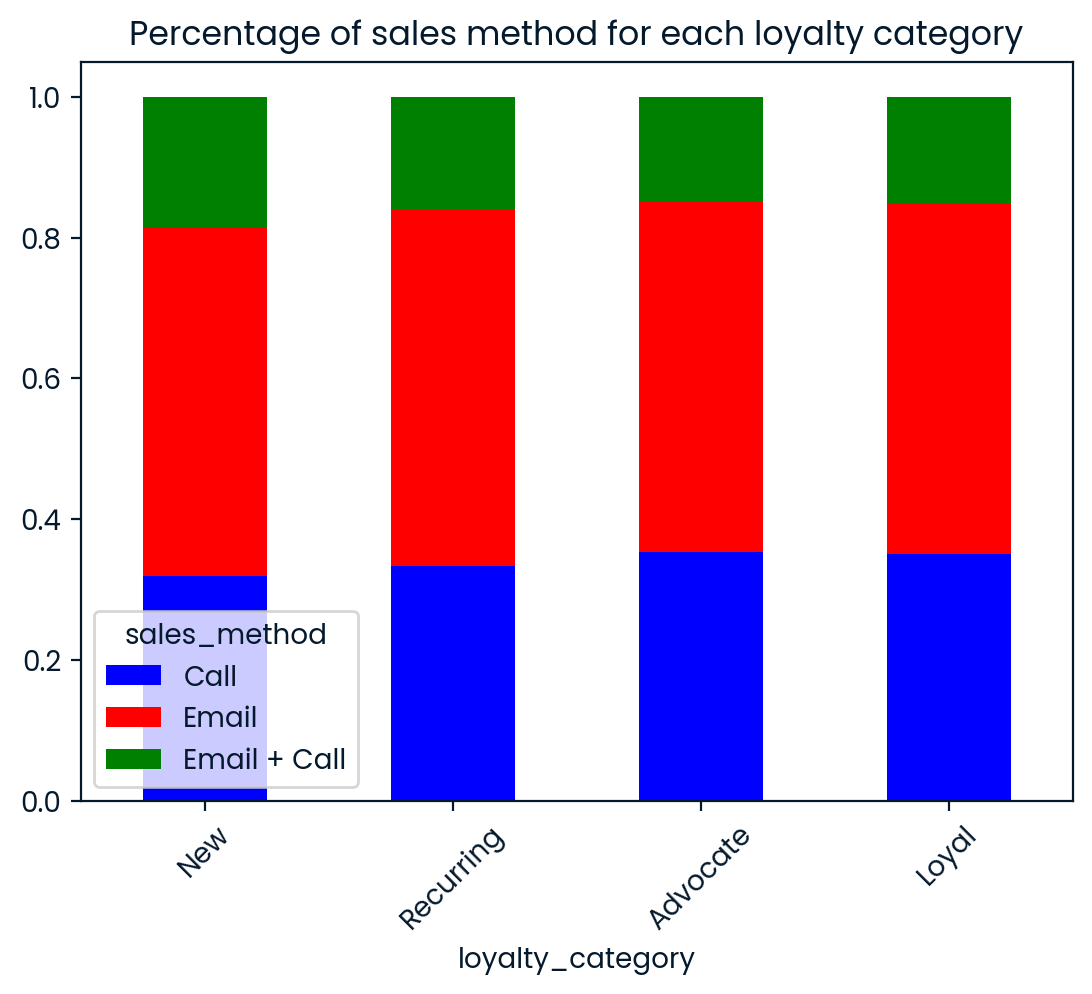

In [33]:
sales.groupby('loyalty_category')['sales_method'].value_counts(normalize=True).unstack().plot(kind='bar',color={'red','green','blue'},stacked=True,title='Percentage of sales method for each loyalty category')
plt.xticks(rotation=45) 
plt.show()

![](perc_method_by_loyalty.png)

There is no significant difference in the proportion of selling methods across all loyalty category.

In [34]:
print(sales.groupby(['loyalty_category','sales_method'])['revenue'].sum().unstack())

sales_method           Call      Email  Email + Call
loyalty_category                                    
New               117259.83  365868.53     262749.63
Recurring          64401.96  200219.76     120845.30
Advocate           46211.79  133133.40      74776.30
Loyal               8517.49   24994.44      14359.72


| |Call |Email |Email & Call|
|---|---|---|---|                                   
|New               |117259.83  |365868.53     |262749.63|
|Recurring          |64401.96  |200219.76     |120845.30|
|Advocate           |46211.79  |133133.40      |74776.30|
|Loyal               |8517.49   |24994.44      |14359.72|

Likewise, in each loyalty category, there was no significant difference in the relative amount of revenue generated by each method. For all loyalty category, sales by Email generated the most revenue, followed by Email+Call and then Call

<AxesSubplot: title={'center': 'Percentage of sales volume by loyal category'}, ylabel='nb_sold'>

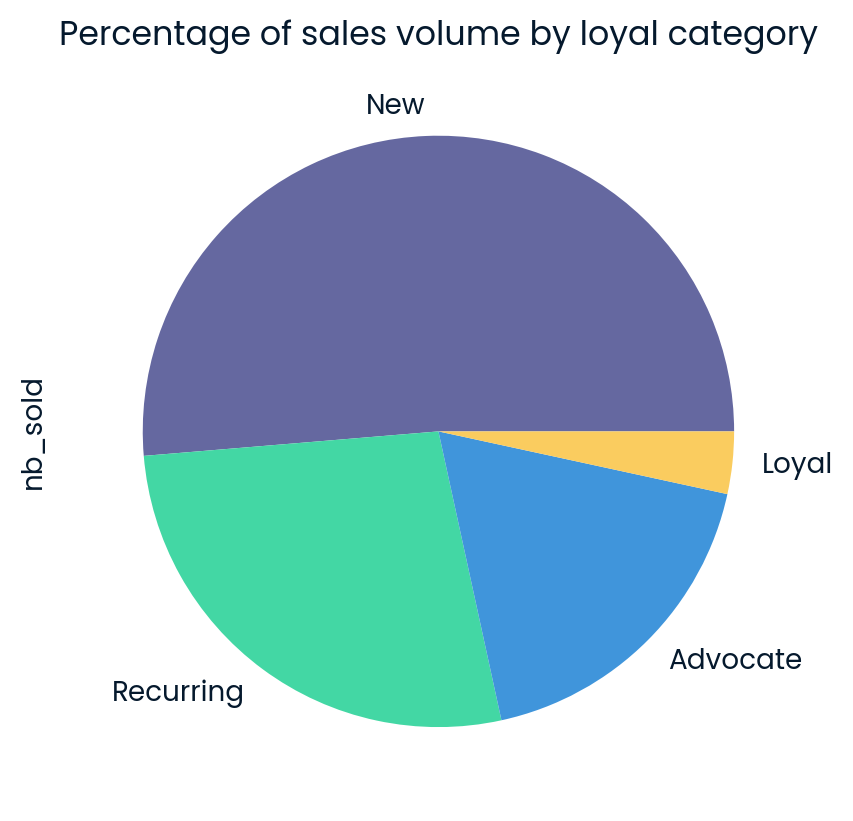

In [35]:
sales.groupby('loyalty_category')['nb_sold'].sum().plot(kind='pie',title='Percentage of sales volume by loyal category')

![](Count_customers_by_loyalty_category.png)

Count of customers for each loyalty category follows the same downward trend with a consolidating phase from week 2 to week 5. The only distinguishing detail was the vastly different count of customers across loyalty category.

![](perc_sales_volume_by_loyalty.png)


50% of sales volume came from New customers through out the entire recorded period. This suggests that focusing on acquiring new customers for our new product line should be the primary goal going forward.

<AxesSubplot: title={'center': 'Count of customers by loyalty category over time'}, xlabel='week'>

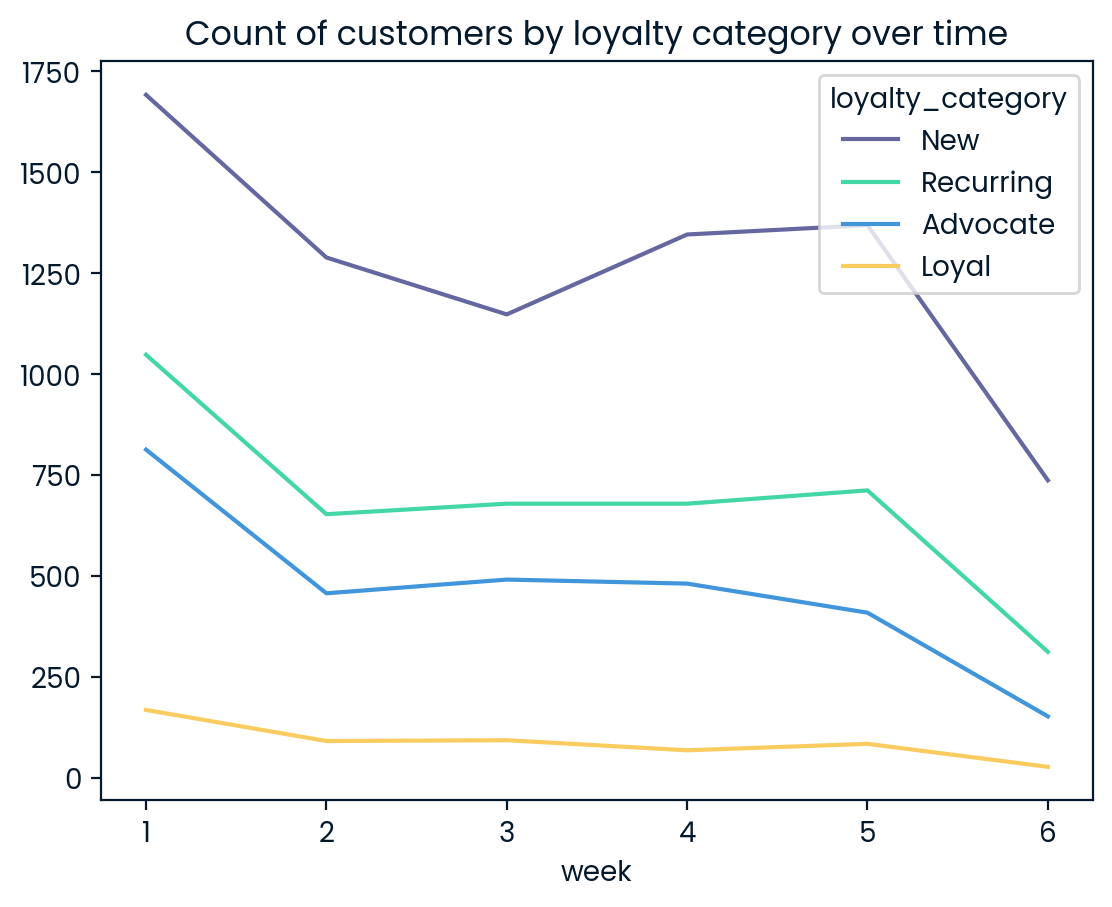

In [36]:
sales.groupby('week')['loyalty_category'].value_counts().unstack().plot(kind='line',title='Count of customers by loyalty category over time')

## 3. METRIC DEFINITION

Based on the previous analysis, it can be observed that Email + Call had the higher potential to generate revenue over time compared to Email method, while also required less time from the company to acquire a single customer than the Call method.

To monitor the effectiveness of the chosen method in generating revenue over time, we need to constantly measure marginal revenue gained for each single time unit spent persuading a customer. 

This metric is calculated by dividing the total revenue generated in each week by the total amount of time allocated to acquire all customers in that same week. In this report, the time unit used for calculation of marginal revenue is an hour (60 minutes)

Here is the current state of the defined metric:

![](Weekly_revenue_per_hour_email_n_call.png)

As of the time of this report, a steady climb of this metric indicates that the Email + Call method has been proving its efficiency and effectiveness in generating revenue. 

Close monitoring of this metric enables us to reveal any reduction in customer acquisition relative to the time spent when using this method, prompting the company to reconsider its strategy in a timely manner.

<AxesSubplot: title={'center': 'Weekly revenue generated per hour using Email + Call method'}>

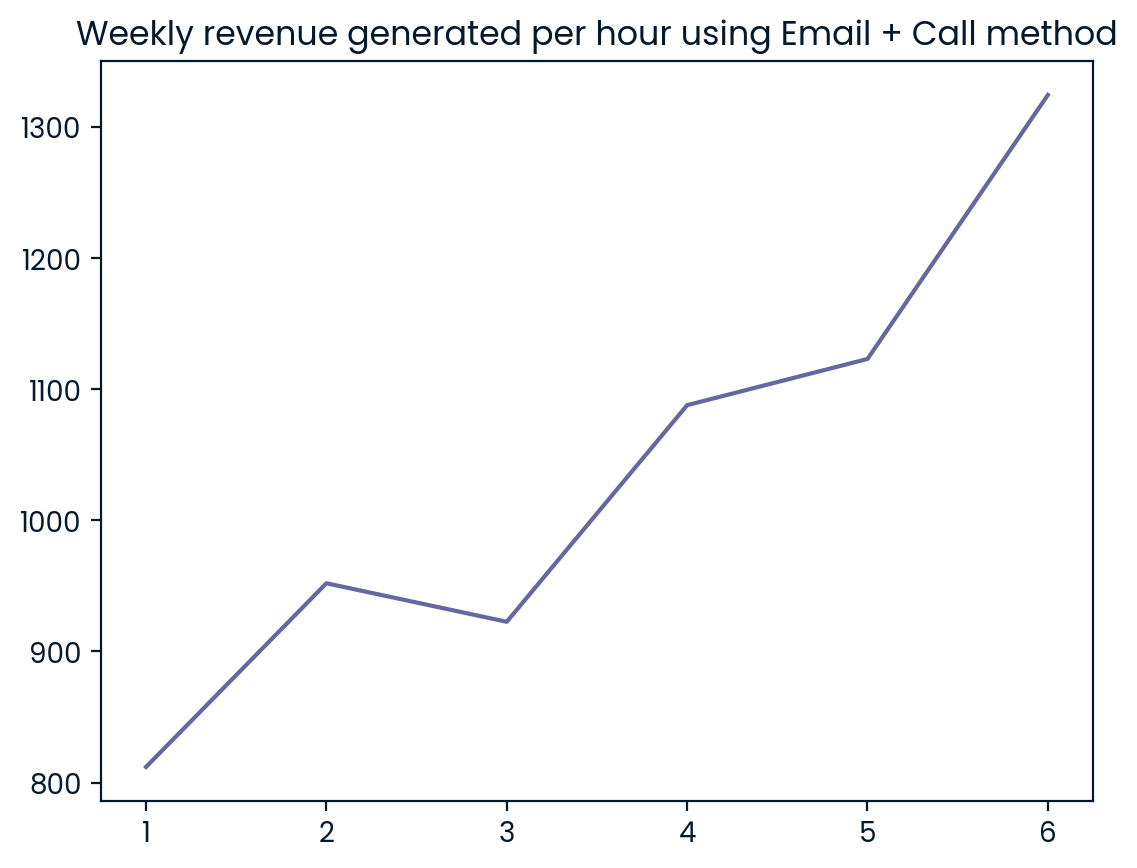

In [37]:
sales_email_n_call = sales[sales['sales_method']=='Email + Call']
time_spent_per_week = sales_email_n_call['week'].value_counts() * (1/6)
revenue_per_week = sales_email_n_call.groupby('week')['revenue'].sum()
revenue_per_hour = revenue_per_week / time_spent_per_week
revenue_per_hour.plot(kind='line',title='Weekly revenue generated per hour using Email + Call method')

In [38]:
rev_per_week = sales.groupby('week').agg(total_revenue=('revenue','sum'))
total_rev_change= rev_per_week['total_revenue'].diff()
total_rev_change

week
1         NaN
2   -79688.38
3   -15175.33
4    57182.87
5    25539.75
6   -99535.70
Name: total_revenue, dtype: float64

<AxesSubplot: title={'center': 'Total revenue by each week'}, xlabel='week'>

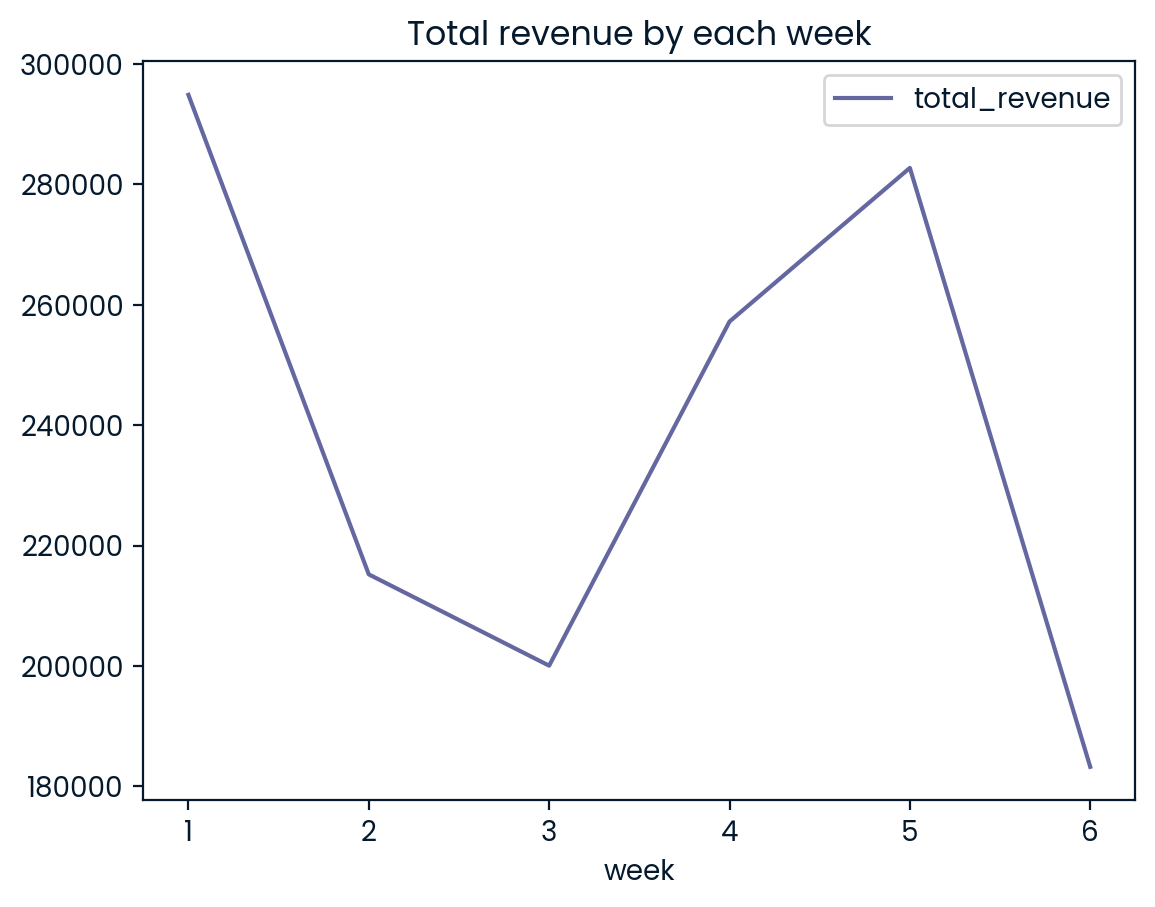

In [39]:
rev_per_week.plot(kind='line',title='Total revenue by each week')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6')])

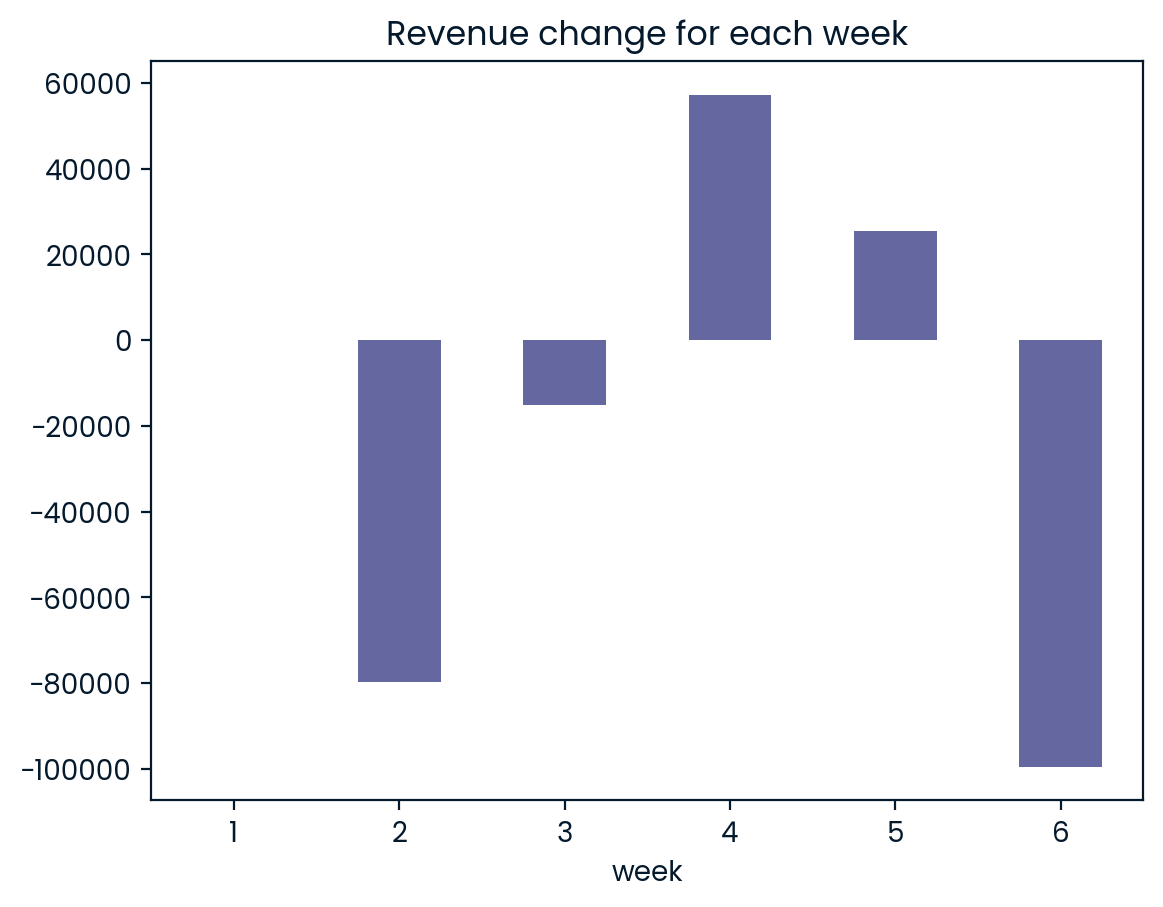

In [40]:
total_rev_change.plot(kind='bar',title='Revenue change for each week')
plt.xticks(rotation=0)

<AxesSubplot: title={'center': 'Percentage of Email + Call over time'}, xlabel='week'>

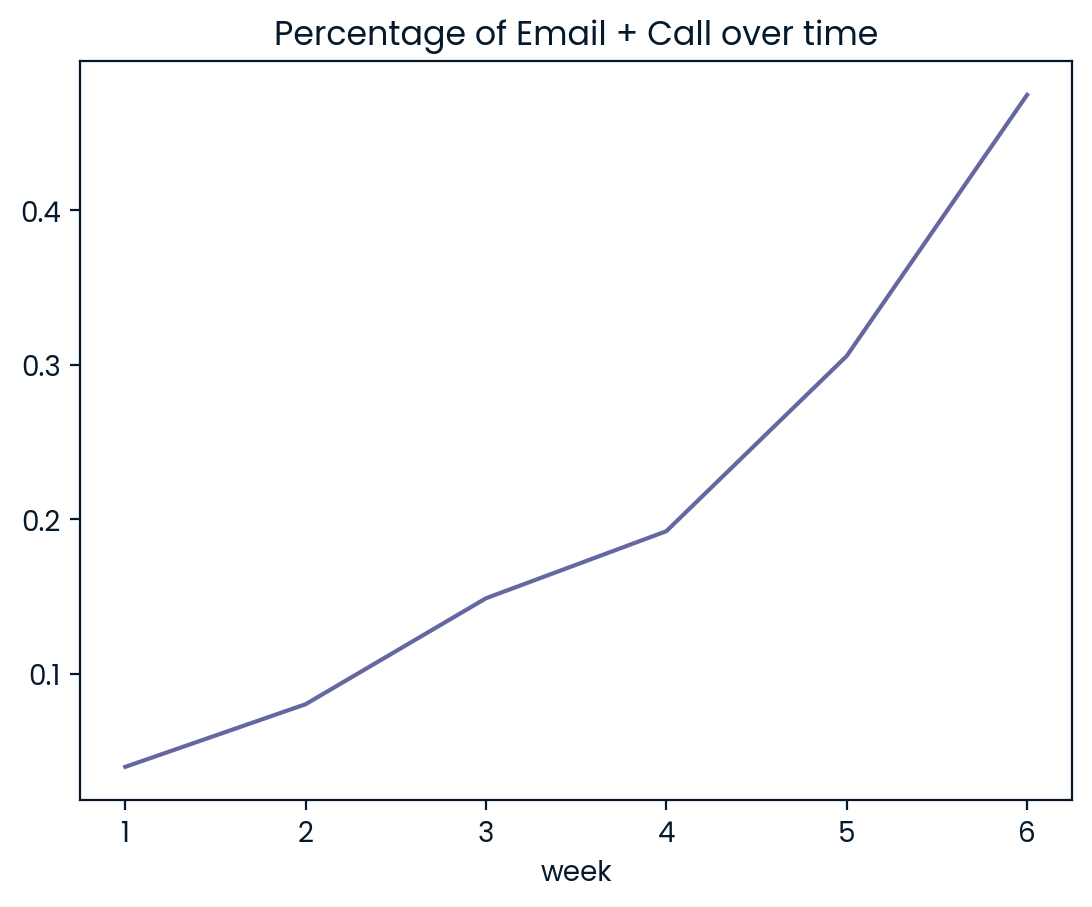

In [41]:
method_by_week.loc[(slice(None),'Email + Call')].plot(kind='line',title='Percentage of Email + Call over time')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6')])

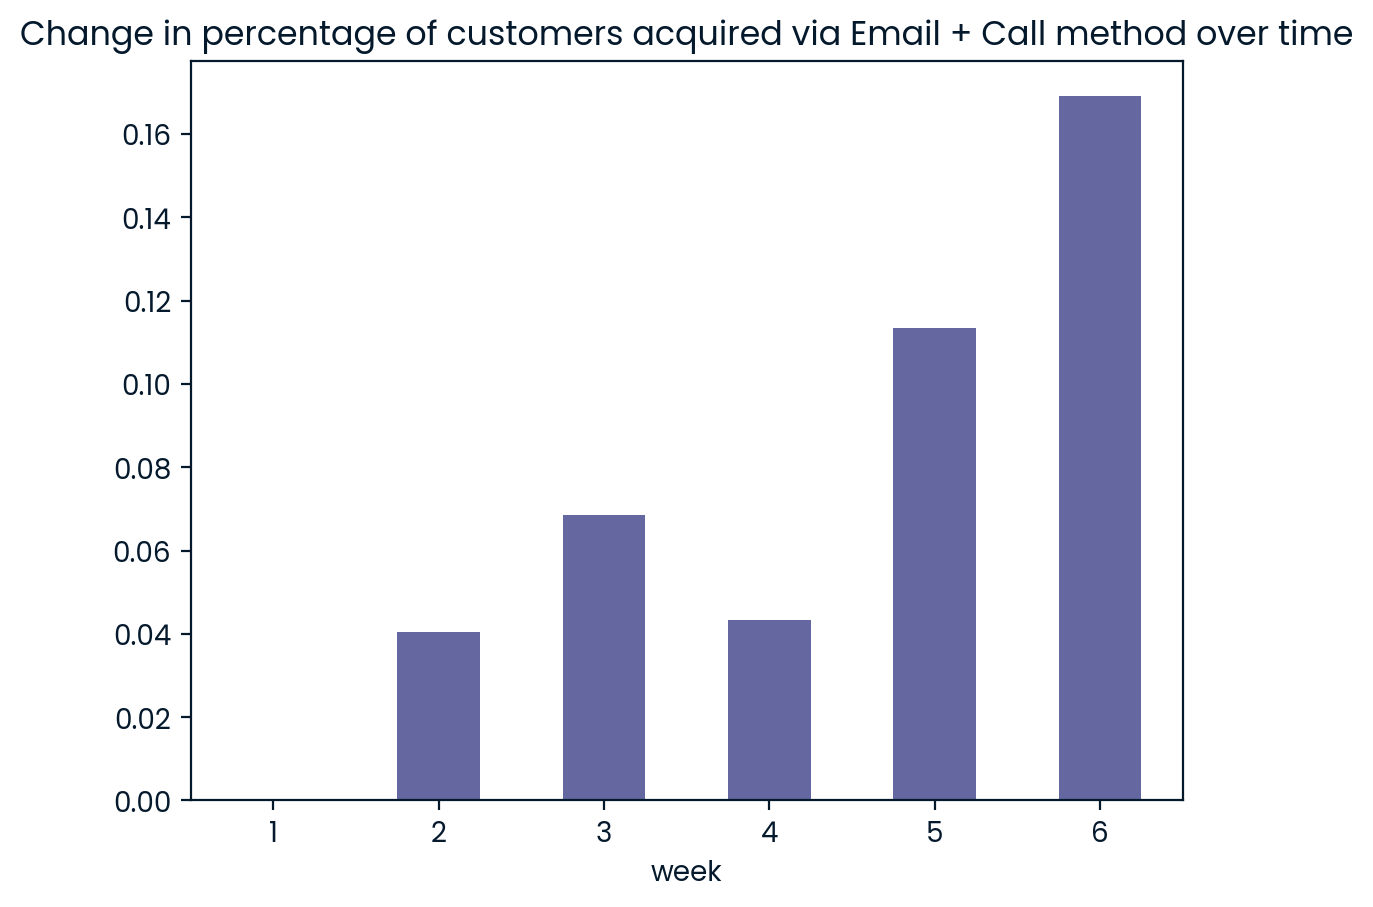

In [42]:
Email_Call_change = method_by_week.loc[(slice(None),'Email + Call')].diff()
Email_Call_change.plot(kind='bar',title='Change in percentage of customers acquired via Email + Call method over time')
plt.xticks(rotation=0)

![](change_perc_customers_email_call_over_time.png)

Additionally, an alternative metric to keep an eye on can be the weekly percentage change of customers acquired via the Email + Call method. 

This second metric should be helpful in discerning whether changes in weekly revenue is due to changes in number of customers acquired using the method or if there has been a shift in the purchase value of each customer (changes either in quantity or product choice)

As observed, an increasing percentage of customers has been acquired by Email + Call method, solidifying it as the current top choice. 

## 4. SUMMARY AND RECOMMENDATIONS

In summary, the analysis suggests the following main findings:

1. The largest amount of customers and the highest amount of revenue were acquired within the 1st week. The initial email was effective in attracting sales in the 1st week. After the 1st week, the total acquisition of customers gradually decreased. 


2. Despite this overall decrease in the absolute total number of sales made over time after the 1st week, the relative percentage of sales made through Email + Call increased noticeably.


3. The subsequent calls proved more effective in growing sales than sending emails from the 2nd week onward. Subsequent calls from the 2nd week onward drove the recovery of overall revenue in the 3rd week up until the 5th week.


4. The Email + Call method generated the highest spread of revenue from a typical customer compared to the other two, explaining the rapid recovery in overall revenue when this method succeeded in attracting more customers from the 3rd week.


5. New buyers with less than 1 year as our customer accounted for 50% of the total sales volume. No significant difference was found in how often each method was used for each of the different loyalty levels.

### Recommendations

Moving forward, the company should implement Email + Call method due to its proven effectiveness and efficiency. Effort of the sales team should be focused on acquiring new customers and stimulating purchases from those that have been buying from us for less than a year. Meanwhile, those with more years as customers should be allocated less time to illicit recurring purchases.

To monitor the performance of the chosen Email + Call method in generating revenue, we monitor the marginal revenue made in each hour spent calling customers. This metric is measured weekly. Furthermore, the change in percentage of customers acquired through this method should also be kept in check on a weekly basis.

In the future, if the company plans to launch a new product line, it should aim to focus its effort within the first 5 weeks using the chosen method to leverage the high amount of new customer acquisition in the initial phase after launch.